**Лабораторная работа №5: Линейная регрессия**

**Выполнила: Мишагина Валерия 6133**



Датасет -  [Bike Sharing Dateset](https://www.kaggle.com/datasets/rishabhbarman/bike-sharing-dateset)

**№1.** Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [32]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('day.csv')

# Датасет и подготовка данных, этап 1

**№2.1** Привести описание датасета.

In [3]:
# информация о данных в DataFrame, тип данных признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data.shape

(731, 16)

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**№2.2** Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные"




In [6]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.drop('instant', axis=1, inplace=True)
data.drop('dteday', axis=1, inplace=True)

In [15]:
data.drop('mnth', axis=1, inplace=True)
data.drop('weekday', axis=1, inplace=True)

In [37]:
data.drop('registered', axis=1, inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   workingday  731 non-null    int64  
 4   weathersit  731 non-null    int64  
 5   temp        731 non-null    float64
 6   atemp       731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   casual      731 non-null    int64  
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


**№2.3** Нормализовать численные данные

Будем предсказывать количество сданных в аренду велосипедов `cnt`

In [39]:
x = data.drop('cnt', axis=1)
y = data['cnt']

Далее нам потребуется разделение датасета на 2: без категориальных признаков и с ними. В представленном датасете мы имеем уже закодированные категориальные признаки, поэтому вручную разделим признаки на числовые и категориальные для дальнейшего анализа

In [42]:
categorical_cols = ['season', 'yr', 'holiday', 'workingday', 'weathersit']
number_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual']
cols = x.columns

In [43]:
scaler = StandardScaler()
scaler.fit(x[number_cols])
x[number_cols] = scaler.transform(x[number_cols])
x = pd.DataFrame(x, columns=cols)
x.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,1,0,0,0,2,-0.826662,-0.679946,1.250171,-0.387892,-0.753734
1,1,0,0,0,2,-0.721095,-0.740652,0.479113,0.749602,-1.045214
2,1,0,0,1,1,-1.634657,-1.749767,-1.339274,0.746632,-1.061246
3,1,0,0,1,1,-1.614780,-1.610270,-0.263182,-0.389829,-1.078734
4,1,0,0,1,1,-1.467414,-1.504971,-1.341494,-0.046307,-1.116627


**2.3** Визуализировать `heatmap`-матрицу кореллированности признаков

<Axes: >

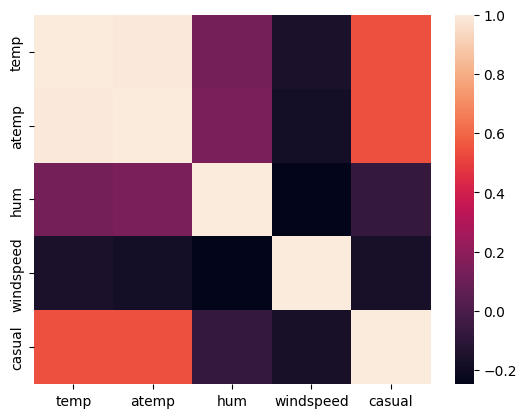

In [44]:
sns.heatmap(x[number_cols].corr())

**2.4** Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas`.`plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции)

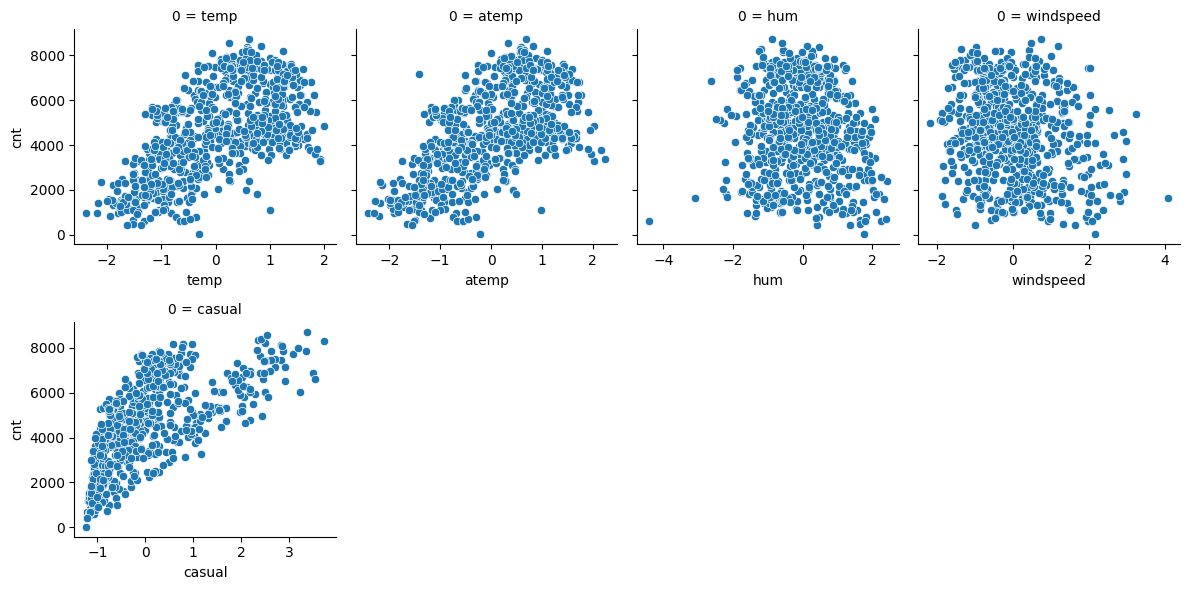

In [45]:
fig = sns.FacetGrid(pd.DataFrame(number_cols), col=0, col_wrap=4, sharex=False)
for ax, varx in zip(fig.axes, number_cols):
    sns.scatterplot(data=pd.concat([x[number_cols], y], axis=1), x=varx, y='cnt', ax=ax)
fig.tight_layout()

**2.5** Разбить выборку на обучающую и тестовую.
> Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа)





In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [47]:
# размерности выборок
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (548, 10)
y_train shape: (548,)
X_test shape: (183, 10)
y_test shape: (183,)


In [48]:
x_train_n, x_test_n = x_train[number_cols], x_test[number_cols]

# Регрессия МНК

**3.1** Обучить модель линейной регрессии LinearRegression

In [49]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_n, y_train)

LinearRegression()

**3.2** Вывести метрики *MSE, MAE, R^2* на тестовом наборе

In [50]:
preds = linear_reg_model.predict(x_test_n)

In [51]:
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, preds)}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test,preds)}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, preds)}")

Средняя квадратичная ошибка (MSE): 1573816.7785798416
Средняя абсолютная ошибка (MAE): 1043.0504298313424
Коэффициент детерминации (R2 score): 0.5364443626014422


**3.3** Вывести `model.coef_` и `model.intercept_`

In [56]:
print(f".coef_: {linear_reg_model.coef_}")
print(f".intercept_: {linear_reg_model.intercept_}")

.coef_: [ 297.81022358  492.3248053  -299.4480975  -289.19249023  833.39452862]
.intercept_: 4529.368067584041


In [57]:
df_features = pd.DataFrame(columns=number_cols, data=np.reshape(linear_reg_model.coef_, (1, -1)))
df_features

,temp,atemp,hum,windspeed,casual
0,297.810224,492.324805,-299.448097,-289.19249,833.394529


**3.4** Построить график (`barh`) с важностью коэфициентов при соответствующих признаков (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси)

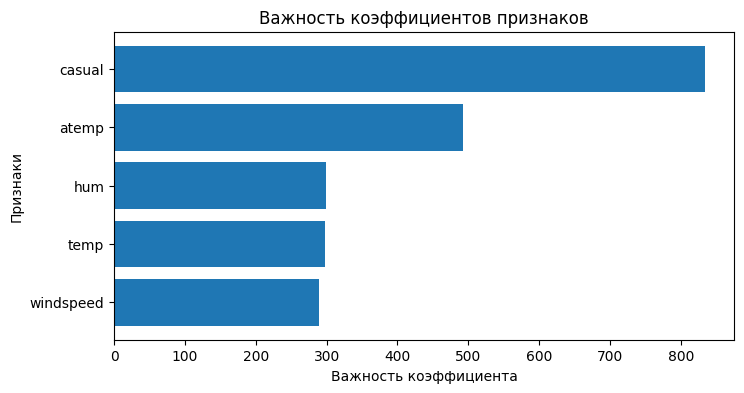

In [61]:
coeff = linear_reg_model.coef_
sorted_indexes = np.argsort(np.abs(coeff))[::-1].tolist()
plt.figure(figsize=(8, 4))
plt.barh(np.array(number_cols)[sorted_indexes], np.abs(coeff)[sorted_indexes])
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков')
plt.gca().invert_yaxis()
plt.show()

# `Ridge`,` LASSO`, `Elastic Net`

**4.1** Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`) с использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)

In [87]:
grid_ridge = {'alpha': np.arange(1, 10, 0.25)}
grid_lasso = {'alpha': np.arange(1, 10, 0.25)}
grid_elastic_net = {'alpha': np.arange(1, 10, 0.25), 'l1_ratio': [0.25, 0.5, 0.75]}

In [88]:
ridge = Ridge()
search_ridge = GridSearchCV(ridge, grid_ridge)
search_ridge.fit(x_train_n, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25,
       6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ,
       9.25, 9.5 , 9.75])})

In [170]:
lasso = Lasso()
search_lasso = GridSearchCV(lasso, grid_lasso)
search_lasso.fit(x_train_n, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25,
       6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ,
       9.25, 9.5 , 9.75])})

In [90]:
elastic_net = ElasticNet()
search_elastic_net = GridSearchCV(elastic_net, grid_elastic_net)
search_elastic_net.fit(x_train_n, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25,
       6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ,
       9.25, 9.5 , 9.75]),
                         'l1_ratio': [0.25, 0.5, 0.75]})

**4.2** Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели

In [91]:
# значения гиперпараметров
print(f'ridge: {search_ridge.best_params_}')
print(f'lasso: {search_lasso.best_params_}')
print(f'elastic net: {search_elastic_net.best_params_}')

ridge: {'alpha': 9.75}
lasso: {'alpha': 7.0}
elastic net: {'alpha': 1.0, 'l1_ratio': 0.75}


In [171]:
ridge_best_model = search_ridge.best_estimator_
lasso_best_model = search_lasso.best_estimator_
elastic_net_best_model = search_elastic_net.best_estimator_

In [97]:
# коэффициенты регрессии
print("Ridge regression\n")
print(f"model.intercept_: {ridge_best_model.intercept_}")
pd.DataFrame(columns=number_cols, data=np.reshape(ridge_best_model.coef_, (1, -1)))

Ridge regression

model.intercept_: 4529.370716327676


,temp,atemp,hum,windspeed,casual
0,359.804049,430.693906,-293.907739,-286.247106,819.69304


In [100]:
# коэффициенты регрессии
print("Lasso regression\n")
print(f"model.intercept_: {lasso_best_model.intercept_}")
pd.DataFrame(columns=number_cols, data=np.reshape(lasso_best_model.coef_, (1, -1)))

Lasso regression

model.intercept_: 4529.178559291299


,temp,atemp,hum,windspeed,casual
0,293.107649,491.075099,-289.601819,-280.610096,831.822688


In [101]:
# коэффициенты регрессии
print("Elastic Net regression\n")
print(f"model.intercept_: {elastic_net_best_model.intercept_}")
pd.DataFrame(columns=number_cols, data=np.reshape(elastic_net_best_model.coef_, (1, -1)))

Elastic Net regression

model.intercept_: 4528.01993568532


,temp,atemp,hum,windspeed,casual
0,382.267245,392.832394,-237.549101,-237.625764,683.633663


In [102]:
#значения метрик
def getMetrics(preds):
  print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, preds)}")
  print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test,preds)}")
  print(f"Коэффициент детерминации (R2 score): {R2(y_test, preds)}")

print("Ridge regression\n")
preds = ridge_best_model.predict(x_test_n)
getMetrics(preds)

print("\nLasso regression\n")
preds = lasso_best_model.predict(x_test_n)
getMetrics(preds)

print("\nElastic Net regression\n")
preds = elastic_net_best_model.predict(x_test_n)
getMetrics(preds)

Ridge regression

Средняя квадратичная ошибка (MSE): 1570841.1170562187
Средняя абсолютная ошибка (MAE): 1042.2407189199994
Коэффициент детерминации (R2 score): 0.5373208208353607

Lasso regression

Средняя квадратичная ошибка (MSE): 1570254.3119633198
Средняя абсолютная ошибка (MAE): 1042.3510571603097
Коэффициент детерминации (R2 score): 0.5374936597658955

Elastic Net regression

Средняя квадратичная ошибка (MSE): 1556155.7884119495
Средняя абсолютная ошибка (MAE): 1038.8375935910099
Коэффициент детерминации (R2 score): 0.5416462715312443


**4.3** Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси)

In [104]:
def bash_plot(model, regression_name) :
  coeff = model.coef_
  sorted_indexes = np.argsort(np.abs(coeff))[::-1].tolist()
  plt.figure(figsize=(8, 4))
  plt.barh(np.array(number_cols)[sorted_indexes], np.abs(coeff)[sorted_indexes])
  plt.xlabel('Важность коэффициента')
  plt.ylabel('Признаки')
  plt.title(regression_name + 'Важность коэффициентов признаков.')
  plt.gca().invert_yaxis()
  plt.show()

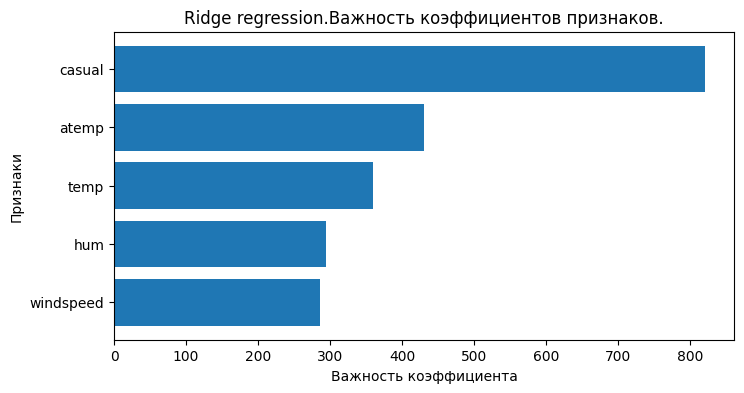

In [105]:
bash_plot(ridge_best_model, "Ridge regression.")

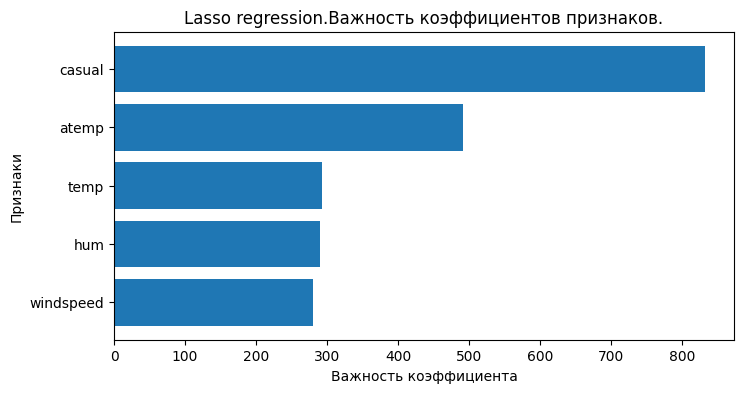

In [106]:
bash_plot(lasso_best_model, "Lasso regression.")

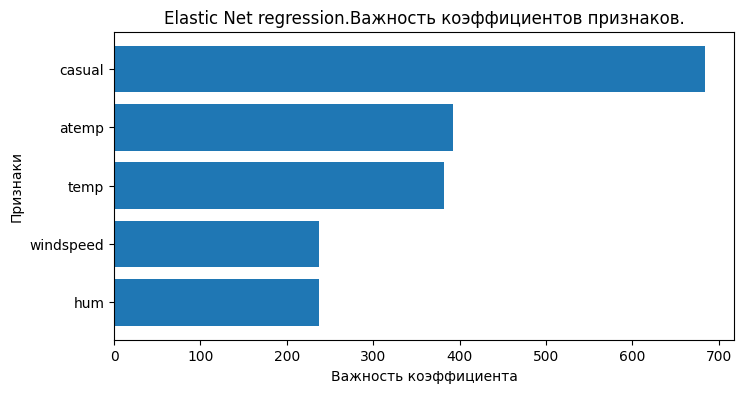

In [107]:
bash_plot(elastic_net_best_model, "Elastic Net regression.")

# Датасет и подготовка данных, этап 2

**5.1** Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками

In [109]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 214 to 260
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      548 non-null    int64  
 1   yr          548 non-null    int64  
 2   holiday     548 non-null    int64  
 3   workingday  548 non-null    int64  
 4   weathersit  548 non-null    int64  
 5   temp        548 non-null    float64
 6   atemp       548 non-null    float64
 7   hum         548 non-null    float64
 8   windspeed   548 non-null    float64
 9   casual      548 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 47.1 KB


In [110]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 548 entries, 214 to 260
Series name: cnt
Non-Null Count  Dtype
--------------  -----
548 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


**5.2** Закодировать категориальные признаки в обучающей и тестовой выборках

В данном датасете все категориальные признаки уже закодированы

# Регрессии, этап 2

**6.1** Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками

In [111]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [112]:
ridge_best_model.fit(x_train, y_train)

Ridge(alpha=9.75)

In [172]:
lasso_best_model.fit(x_train, y_train)

Lasso(alpha=7.0)

In [114]:
elastic_net_best_model.fit(x_train, y_train)

ElasticNet(l1_ratio=0.75)

**6.2** Вывести коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе

In [115]:
# коэффициенты регрессии
print("Linear regression\n")
print(f"model.intercept_: {linear_reg_model.intercept_}")
pd.DataFrame(columns=cols, data=np.reshape(linear_reg_model.coef_, (1, -1)))

Linear regression

model.intercept_: 2382.469700210494


,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,383.651512,1603.935332,-21.743101,1426.058528,-452.588589,43.94292,357.282196,-82.074288,-99.79832,1046.594662


In [116]:
# коэффициенты регрессии
print("Ridge regression\n")
print(f"model.intercept_: {ridge_best_model.intercept_}")
pd.DataFrame(columns=cols, data=np.reshape(ridge_best_model.coef_, (1, -1)))

Ridge regression

model.intercept_: 2528.8187261028415


,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,379.351903,1531.605044,-90.039735,1207.266362,-412.710458,179.000694,278.676584,-111.626881,-119.294378,957.745365


In [173]:
# коэффициенты регрессии
print("Lasso regression\n")
print(f"model.intercept_: {lasso_best_model.intercept_}")
pd.DataFrame(columns=cols, data=np.reshape(lasso_best_model.coef_, (1, -1)))

Lasso regression

model.intercept_: 2408.5457999868904


,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,379.13771,1585.13738,-0.0,1373.039968,-430.348417,51.842373,357.767119,-83.168632,-96.965408,1029.470142


In [118]:
# коэффициенты регрессии
print("Elastic Net regression\n")
print(f"model.intercept_: {elastic_net_best_model.intercept_}")
pd.DataFrame(columns=cols, data=np.reshape(elastic_net_best_model.coef_, (1, -1)))

Elastic Net regression

model.intercept_: 3274.480126298801


,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,326.41973,889.097837,-58.782281,421.640264,-226.729347,312.591028,320.378842,-190.027292,-162.622512,646.197672


In [174]:
#значения метрик
def getMetrics(preds):
  print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, preds)}")
  print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test,preds)}")
  print(f"Коэффициент детерминации (R2 score): {R2(y_test, preds)}")

print("Linear regression\n")
preds = linear_reg_model.predict(x_test)
getMetrics(preds)

print("Ridge regression\n")
preds = ridge_best_model.predict(x_test)
getMetrics(preds)

print("\nLasso regression\n")
preds = lasso_best_model.predict(x_test)
getMetrics(preds)

print("\nElastic Net regression\n")
preds = elastic_net_best_model.predict(x_test)
getMetrics(preds)

Linear regression

Средняя квадратичная ошибка (MSE): 374088.7120128243
Средняя абсолютная ошибка (MAE): 447.83633163162125
Коэффициент детерминации (R2 score): 0.889815044736535
Ridge regression

Средняя квадратичная ошибка (MSE): 377795.9283346371
Средняя абсолютная ошибка (MAE): 450.5672549926606
Коэффициент детерминации (R2 score): 0.8887231126587852

Lasso regression

Средняя квадратичная ошибка (MSE): 371680.8406789999
Средняя абсолютная ошибка (MAE): 445.02754308833966
Коэффициент детерминации (R2 score): 0.8905242647334981

Elastic Net regression

Средняя квадратичная ошибка (MSE): 665242.3584591709
Средняя абсолютная ошибка (MAE): 640.3210256351637
Коэффициент детерминации (R2 score): 0.8040579756823221


**6.3** Сравнить метрики с наличием категориальных признаков и без для каждой из моделей

Метрики для всех четырех моделей регрессии заметно улучшились: коэффициент детерминации вырос, а значения средней квадратичной и средней абсолютной ошибок заметно снизились.

**6.4** Выбрать лучшую модель

Наилучшие показатели по метрикам были получены с помощью модели регрессии лассо на наборе обучающих данных с категориальными признаками

In [120]:
best_model = lasso_best_model

**6.5** Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси)

In [122]:
def bash_plot(model, regression_name) :
  coeff = model.coef_
  sorted_indexes = np.argsort(np.abs(coeff))[::-1].tolist()
  plt.figure(figsize=(8, 4))
  plt.barh(np.array(cols)[sorted_indexes], np.abs(coeff)[sorted_indexes])
  plt.xlabel('Важность коэффициента')
  plt.ylabel('Признаки')
  plt.title(regression_name + 'Важность коэффициентов признаков.')
  plt.gca().invert_yaxis()
  plt.show()

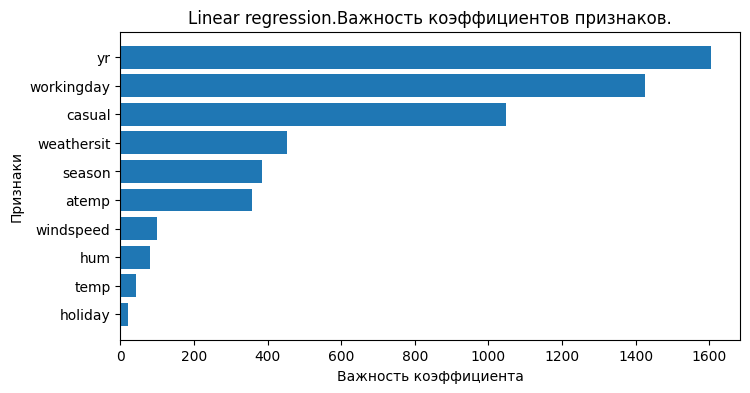

In [123]:
bash_plot(linear_reg_model, "Linear regression.")

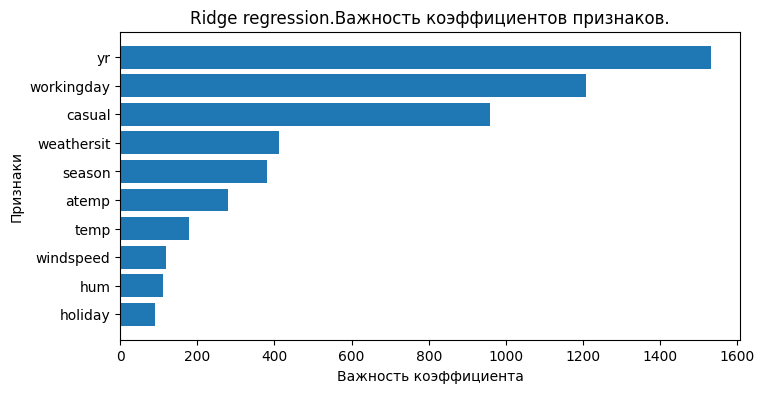

In [124]:
bash_plot(ridge_best_model, "Ridge regression.")

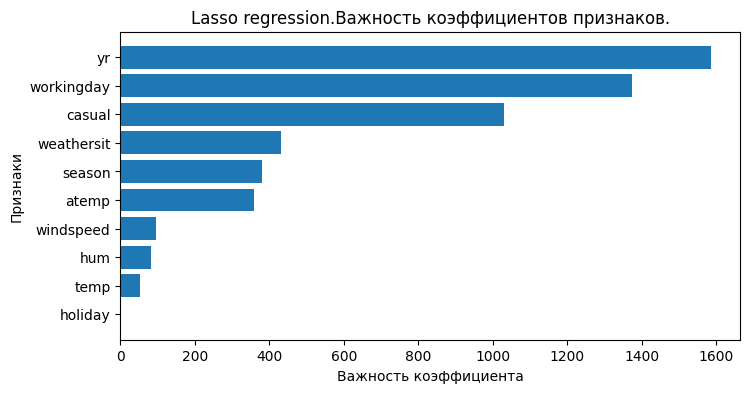

In [175]:
bash_plot(lasso_best_model, "Lasso regression.")

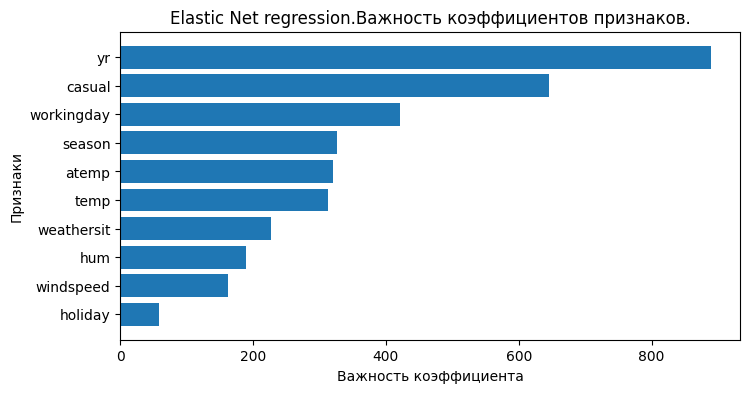

In [126]:
bash_plot(elastic_net_best_model, "Elastic Net regression.")

**6.6** Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`

In [181]:
# фильтрацию выполним для лучшей модели (регрессия лассо)
rfe = RFE(estimator=best_model, n_features_to_select=5)
rf_pipeline = Pipeline(steps=[('rfe', rfe), ('model', best_model)])
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=Lasso(alpha=7.0), n_features_to_select=5)),
                ('model', Lasso(alpha=7.0))])

**6.7** Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси)

In [182]:
rf_pipeline.named_steps['rfe'].get_feature_names_out()

array(['yr', 'workingday', 'weathersit', 'atemp', 'casual'], dtype=object)

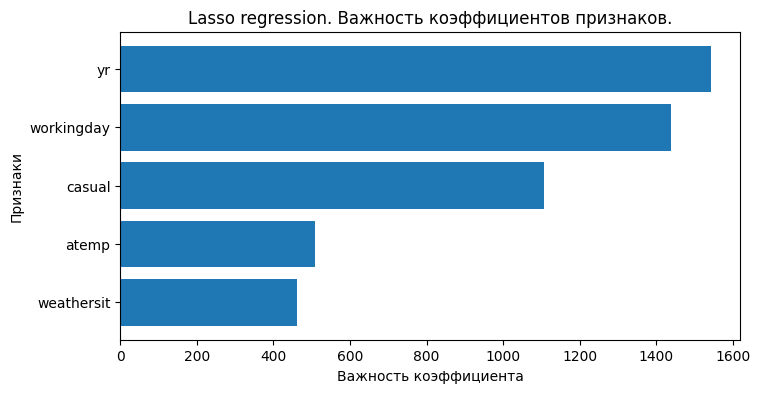

In [186]:
coeff = best_model.coef_
sorted_indexes = np.argsort(np.abs(coeff))[::-1].tolist()
plt.figure(figsize=(8, 4))
plt.barh(np.array(rf_pipeline.named_steps['rfe'].get_feature_names_out())[sorted_indexes], np.abs(coeff)[sorted_indexes])
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Lasso regression. Важность коэффициентов признаков.')
plt.gca().invert_yaxis()
plt.show()

**6.8** Вывести значения метрик на тестовом наборе

In [187]:
preds = rf_pipeline.predict(x_test)
getMetrics(preds)

Средняя квадратичная ошибка (MSE): 511049.0495239915
Средняя абсолютная ошибка (MAE): 561.6159401068269
Коэффициент детерминации (R2 score): 0.84947442985848


После фильтрации признаков метрики ухудшились

**6.9** Сделать вывод:

*   Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
*   Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
*   Вывод о результатах использования Recursive Feature Elimination (лучше или хуже - значения метрик).

Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе) - **Elastic Net regression**

Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе) - **Lasso regression**

Вывод о результатах использования Recursive Feature Elimination - **после фильтрации признаков метрики ухудшились**